# **Prediciendo el Rating de las aplicaciones en Google PlayStore**

![](https://www.datasource.ai/uploads/e33dc9d94a413913f6a65caa5e0d4b75.png)

Competencia en [DatasourceAI](https://www.datasource.ai/es/home/data-science-competitions-for-startups/prediciendo-el-rating-de-las-aplicaciones-en-google-play-store):

DataSource nos provee un problema de **clasificación** en el que basándonos en los datos de una aplicación, tendremos que predecir su **Rating**

La escala del **Rating** se transformó en 2 clases:

- **0** si el Rating es menor o igual que 4 (Rating <= 4.0)

- **1** si el Rating en mayor a 4 (Rating > 4.0)


# **Pregunta 1**

En esta pregunta tienes que cargar las librerías necesarias para armar tu modelo de clasificación.

Importa **Pandas** para leer datos\
Importa **Missingno** para identificar nulos.\
Importa **Seaborn** para identificar outliers.\
Importa **train_test_split** de Sklearn para dividir los datos\
Importa **RandomForestClassifier** y **LogisticRegression** de Sklearn para armar tus modelos\
Importa **accuracy_score** de Sklearn para medir la precisión de tus modelos.  \\

Finalmente **utiliza pandas** para leer los datos que se encuentran en el siguiente enlace:
https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/google_playstore.csv


In [60]:
import pandas as pd
import missingno as ms
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/google_playstore.csv")
data

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Android Ver
0,133,1.0,149723,541,Free,0.00,4764,0.768336,761
1,219,0.0,853,661,Free,0.00,4764,0.641972,1317
2,67,1.0,61881,356,Free,0.00,4764,1.172458,582
3,508,0.0,21943,356,Free,0.00,4764,0.757642,381
4,1114,1.0,6,536,Free,0.00,4764,1.058965,1317
...,...,...,...,...,...,...,...,...,...
5783,195,1.0,69119316,12,Free,0.00,4764,0.306677,582
5784,170,0.0,44,536,Free,0.00,4764,0.644734,143
5785,46,1.0,3005,623,Paid,2.99,4764,0.754550,846
5786,1114,1.0,708,298,Free,0.00,4764,0.559427,137


# **Pregunta 2**

En esta pregunta tienes que realizar todo el **Preprocesamiento** requerido para tu modelo de clasificación.

 - Detecta y reemplaza aquella columna que tiene datos categóricos
 - Identifica si hay o no valores nulos en los datos, de ser así, reemplázalos por la media o moda.


In [28]:
data.dtypes

Category            int64
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating      int64
Genres            float64
Android Ver         int64
dtype: object

In [29]:
y = pd.get_dummies(data.Type)
y

,Free,Paid
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5783,1,0
5784,1,0
5785,0,1
5786,1,0


In [66]:
y2 = pd.get_dummies(data['Content Rating'])
y2

,1,3,189,234,597,4764
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
5783,0,0,0,0,0,1
5784,0,0,0,0,0,1
5785,0,0,0,0,0,1
5786,0,0,0,0,0,1


In [30]:
data.drop(['Type'], axis = 1,inplace=True)
data

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Android Ver
0,133,1.0,149723,541,0.00,4764,0.768336,761
1,219,0.0,853,661,0.00,4764,0.641972,1317
2,67,1.0,61881,356,0.00,4764,1.172458,582
3,508,0.0,21943,356,0.00,4764,0.757642,381
4,1114,1.0,6,536,0.00,4764,1.058965,1317
...,...,...,...,...,...,...,...,...
5783,195,1.0,69119316,12,0.00,4764,0.306677,582
5784,170,0.0,44,536,0.00,4764,0.644734,143
5785,46,1.0,3005,623,2.99,4764,0.754550,846
5786,1114,1.0,708,298,0.00,4764,0.559427,137


In [31]:
data = pd.concat([data, y], axis=1,)

In [32]:
data

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Android Ver,Free,Paid
0,133,1.0,149723,541,0.00,4764,0.768336,761,1,0
1,219,0.0,853,661,0.00,4764,0.641972,1317,1,0
2,67,1.0,61881,356,0.00,4764,1.172458,582,1,0
3,508,0.0,21943,356,0.00,4764,0.757642,381,1,0
4,1114,1.0,6,536,0.00,4764,1.058965,1317,1,0
...,...,...,...,...,...,...,...,...,...,...
5783,195,1.0,69119316,12,0.00,4764,0.306677,582,1,0
5784,170,0.0,44,536,0.00,4764,0.644734,143,1,0
5785,46,1.0,3005,623,2.99,4764,0.754550,846,0,1
5786,1114,1.0,708,298,0.00,4764,0.559427,137,1,0


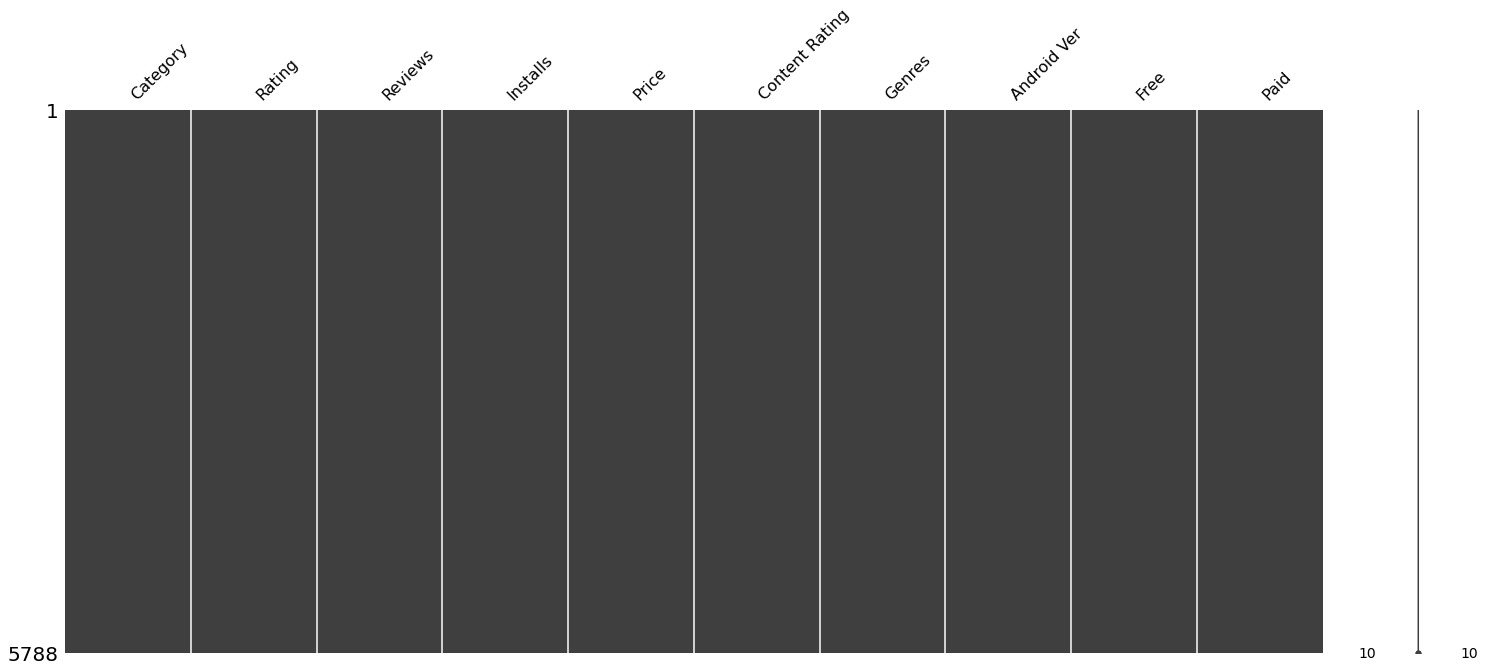

In [33]:
ms.matrix(data)

In [34]:
for col in data.loc[:, data.isna().any()].columns:                                     
  print('En la columna',col,'hay',data[col].isna().sum(),'valores nulos')

In [35]:
check_for_nan = data.isnull().values.any()
print (check_for_nan)

False


# **Pregunta 3**

En esta pregunta deberás realizar la partición de los datos en train y test.

- Utiliza el método de **train_test_split** reservando el **20%** para test.


In [38]:
X = data.drop('Rating',axis=1)
y = data['Rating']

In [77]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.20)

In [78]:
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (4630, 9) y para el y_train (4630,)
Para el X_test: (1158, 9) y para el y_test (1158,)


In [79]:
X_train.describe()

,Category,Reviews,Installs,Price,Content Rating,Genres,Android Ver,Free,Paid
count,4630.000000,4.630000e+03,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,418.561987,2.344315e+05,488.541901,1.084119,3989.536285,0.743334,688.016199,0.917927,0.082073
std,372.558557,2.244599e+06,218.793420,16.168776,1660.476199,0.267761,413.846853,0.274506,0.274506
min,32.000000,0.000000e+00,7.000000,0.000000,1.000000,-0.275977,1.000000,0.000000,0.000000
25%,143.000000,2.300000e+01,298.000000,0.000000,4764.000000,0.563746,381.000000,1.000000,0.000000
50%,233.000000,8.595000e+02,536.000000,0.000000,4764.000000,0.734930,761.000000,1.000000,0.000000
75%,581.000000,2.519200e+04,661.000000,0.000000,4764.000000,0.916336,846.000000,1.000000,0.000000
max,1114.000000,7.815831e+07,841.000000,399.990000,4764.000000,1.866941,1317.000000,1.000000,1.000000


In [80]:
X_test.describe()

,Category,Reviews,Installs,Price,Content Rating,Genres,Android Ver,Free,Paid
count,1158.000000,1.158000e+03,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000
mean,425.084629,2.330004e+05,499.688256,0.776364,4033.712435,0.749778,696.973230,0.926598,0.073402
std,374.980071,1.868823e+06,228.417442,12.202941,1625.500462,0.276083,418.338724,0.260909,0.260909
min,32.000000,0.000000e+00,7.000000,0.000000,189.000000,-0.196034,1.000000,0.000000,0.000000
25%,162.000000,2.300000e+01,308.000000,0.000000,4764.000000,0.553145,381.000000,1.000000,0.000000
50%,233.000000,9.955000e+02,536.000000,0.000000,4764.000000,0.755063,761.000000,1.000000,0.000000
75%,581.000000,3.224675e+04,661.000000,0.000000,4764.000000,0.936770,846.000000,1.000000,0.000000
max,1114.000000,5.664285e+07,841.000000,399.990000,4764.000000,1.635069,1317.000000,1.000000,1.000000


# **Pregunta 4**

En esta pregunta debes realizar el **Modelamiento**. Utiliza **train** (X_train, y train) para entrenar:
- Un modelo de clasificación con **Random Forest**
- Un modelo de clasificación con **Regresión Logistica**

In [81]:
# Regresion Logistica
rl = LogisticRegression(random_state=100) 
rl.fit(X_train, y_train) 
rl_pred = rl.predict(X_test) 
rl_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [82]:
rl_prob = rl.predict_proba(X_test)[:, 1]
rl_prob

array([0.56480538, 0.78289778, 0.69633601, ..., 0.78617835, 0.93564986,
       0.94381901])

In [86]:
coeficientes = pd.DataFrame({'variables':X_train.columns.values, 'betas': np.round(rl.coef_[0],4) })
coeficientes

,variables,betas
0,Category,0.0001
1,Reviews,0.0000
2,Installs,-0.0003
3,Price,0.0000
4,Content Rating,0.0001
5,Genres,0.0000
6,Android Ver,0.0007
7,Free,0.0000
8,Paid,0.0000


In [87]:
# Random Forest
rf = RandomForestClassifier(n_jobs = -1,max_depth=3,random_state=1) #creamos la variable rf para guardar el modelo con los parámetros deseados
rf.fit(X_train,y_train) #entrenamos con datos guardados en X_train, y_train
rf_pred = rf.predict(X_test) #generamos las predicciones usando como variables predictoras los datos en X_test
rf_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [88]:
rf_prob = rf.predict_proba(X_test)[:,1]
rf_prob

array([0.66525541, 0.70695651, 0.7198883 , ..., 0.75383605, 0.84746102,
       0.84962638])

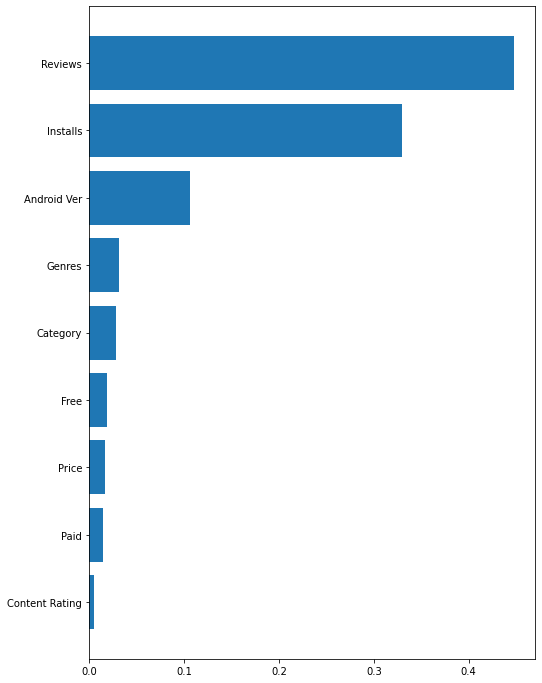

In [89]:
pesos = rf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(pesos)
plt.barh(range(len(indices)), pesos[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.show()

# **Pregunta 5**

En esta pregunta debes realizar la **Evaluación** de ambos modelos:
 - Genera las **predicciones** utilzando **X_test** para ambos modelos
 - Evalúa el rendimiento de cada modelo utilizando **accuracy_score** para comparar y_test versus tus predicciones.

In [90]:
# Score de la Regresion Logistica
print('El accuracy para el modelo de Regresion Logistica es :{0:.4f}'.format(accuracy_score(y_test,rl_pred)))

El accuracy para el modelo de Regresion Logistica es :0.7668


In [91]:
# Score del Random Forest
print('El accuracy para el modelo Random Forest es :{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

El accuracy para el modelo Random Forest es :0.7677


Finalmente comenta **cuál modelo escogerías** y por qué.

En base al accuracy_score el mejor modelo es el Random Forest.